In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('E:/bia600/Project/shootings.csv')

In [4]:
data.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [5]:
#data = data.drop(['id','name'],axis='columns')

In [6]:
data.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [7]:
import matplotlib.pyplot as plt

In [8]:
labels = ['White','Black','Hispanic','Asian','Native','Other']
race = data["race"]

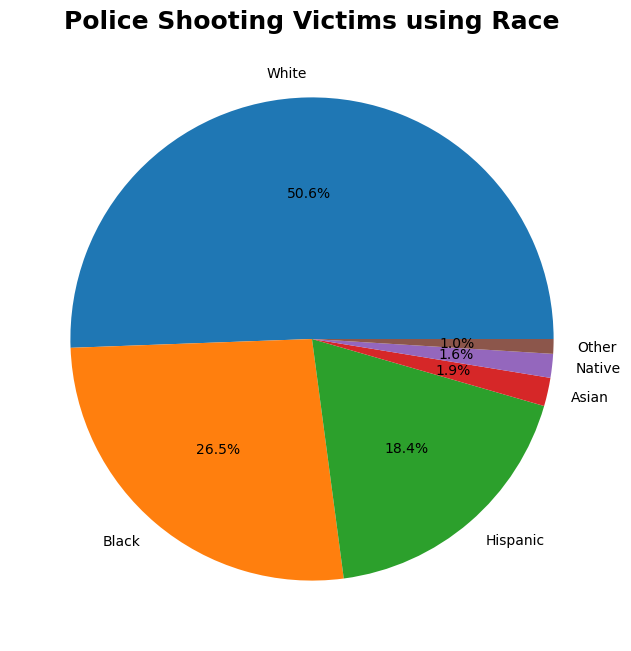

In [9]:
plt.figure(figsize = (8,8) , dpi = 100)
plt.pie(race.value_counts(), labels = labels, autopct='%1.1f%%')
plt.title('Police Shooting Victims using Race', fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

Only 13.4% of the US population is black. But they cover 26.5% of the police shooting. Isn't it strange ?
Does it shows some racial bias ?
Was there any necessity to shoot ?
Also, 76% are white so 51% shooting is acceptable here.
Again, 18.5% american population is hispanic or latino. But they are covering 18.4% of police shooting. Again is there any racial discrimination ?
was there any necessity to shoot ?

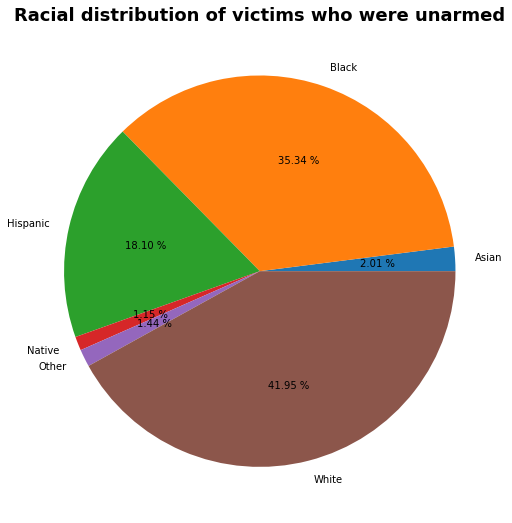

In [10]:
label = np.unique(data.race)
arr = []
for i in label:
    op = data[data.armed == 'unarmed']
    op = op[op.race == i]
    arr.append(op.shape[0])
fig = plt.figure(figsize=(9 ,9))
plt.pie(arr,labels = label,autopct = '%.2f %%')
plt.title("Racial distribution of victims who were unarmed" , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()  

35% of the black people were unarmed which clearly shows racial discrimination.


In [11]:
data.gender.value_counts()

M    4673
F     222
Name: gender, dtype: int64

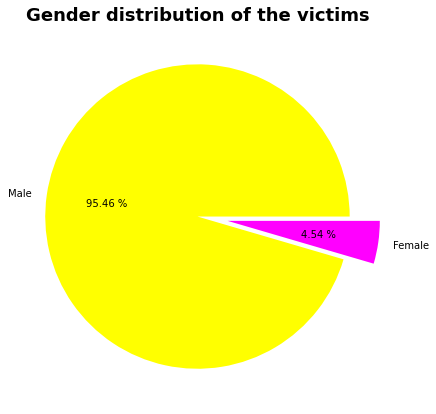

In [12]:
plt.figure(figsize=(7,7))
plt.pie(data.gender.value_counts() , autopct = '%.2f %%' , labels = ['Male' , 'Female'] , colors = ['yellow','magenta'],
       explode = (0,0.2))
plt.title('Gender distribution of the victims' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

95% of the victims are male.

In [18]:
#data.head()
data.age.describe()

count    4895.000000
mean       36.549750
std        12.694348
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

Minimum age of shooting a victim is 6 which does not makes any sense here. What might be the reasons for killing a 6 year old innocent child ? What were the officers even thinking ? Is this acceptable ?

In [19]:
data.loc[data['age'] == 6]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
811,980,Jeremy Mardis,2015-11-03,shot,unarmed,6.0,M,White,Marksville,LA,False,other,Car,True,Unarmed
2761,3229,Kameron Prescott,2017-12-21,shot,unarmed,6.0,M,White,Schertz,TX,False,other,Not fleeing,False,Unarmed


In [20]:
data.loc[data['age'] == 91]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
2071,2407,Frank W. Wratny,2017-03-08,shot,gun,91.0,M,White,Union Township,PA,False,attack,Not fleeing,False,Guns


In [21]:
import seaborn as sns 

<Figure size 936x360 with 0 Axes>

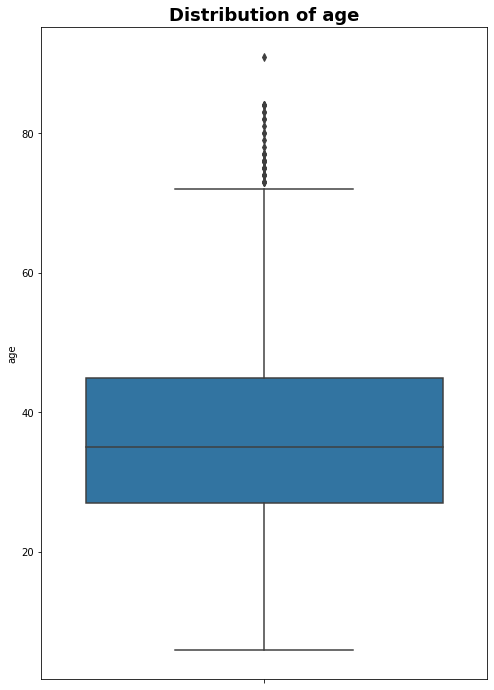

In [22]:
plt.figure(figsize = (13,5))
plt.figure(figsize = (8,12))
sns.boxplot(y = 'age' , data = data)
plt.title('Distribution of age', fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

In [23]:
def get_year(date):
    return date.split('-')[0]

data['year'] = data['date'].apply(lambda x: get_year(x))

data.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns,2015
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,Hispanic,Chandler,AZ,False,attack,Car,False,Guns,2015
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,White,Assaria,KS,False,attack,Not fleeing,False,Guns,2015
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,White,Burlington,IA,False,other,Not fleeing,True,Unarmed,2015
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,Black,Knoxville,PA,False,attack,Not fleeing,False,Other unusual objects,2015


E:\anaconda\Installed_conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


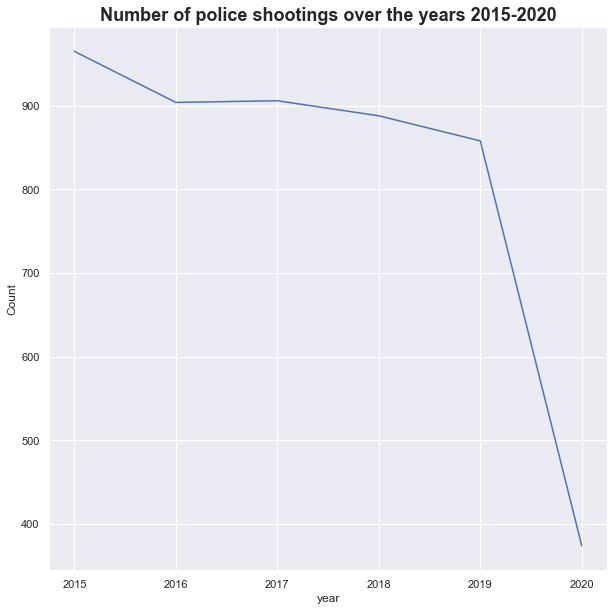

In [24]:
data = data.groupby(['year'])['name'].count().reset_index()
data.columns = ['year', 'Count']
plt.figure(figsize = (10,10))
sns.set_theme(style="darkgrid")
sns.lineplot(data['year'] , data['Count'])
plt.title('Number of police shootings over the years 2015-2020' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

In [25]:
data1 = pd.read_csv('E:/bia600/Project/shootings.csv')

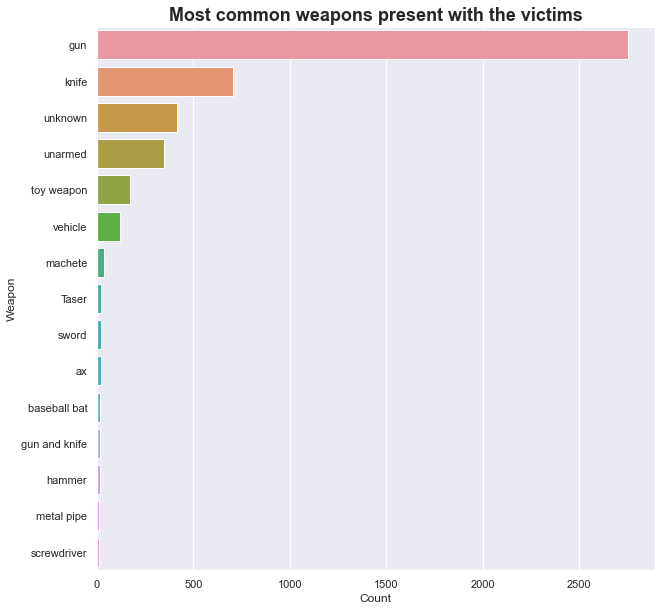

In [27]:
data2 = data1['armed'].value_counts().reset_index().head(15)
data2.columns = ['Weapon' , 'Count']

plt.figure(figsize = (10,10))
sns.barplot(x = 'Count' , y = 'Weapon' , data = data2)
plt.title('Most common weapons present with the victims' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

In [36]:
data2.head()

,Weapon,Count
0,gun,2755
1,knife,708
2,unknown,418
3,unarmed,348
4,toy weapon,171


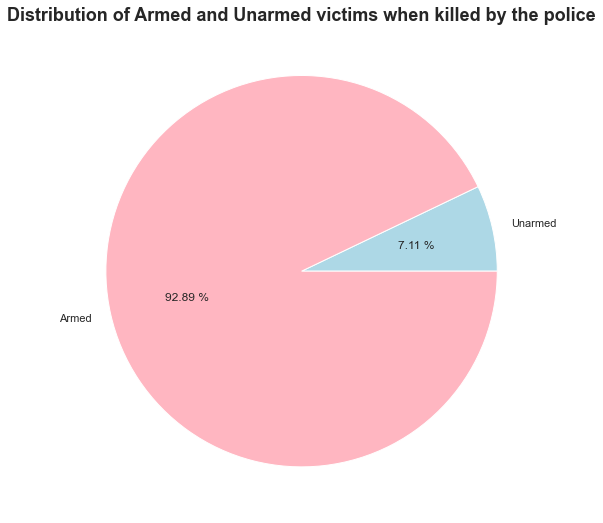

In [37]:
label = ['Unarmed','Armed']
ar = []
op = data1[data1.armed == 'unarmed']
ar.append(op.shape[0])
ar.append(data1.shape[0]-ar[0])


fig = plt.figure(figsize=(9,9))
plt.pie(ar,labels=label,autopct='%.2f %%' , colors = ['lightblue','lightpink'])
plt.title("Distribution of Armed and Unarmed victims when killed by the police" , 
          fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()


In [38]:
data1.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


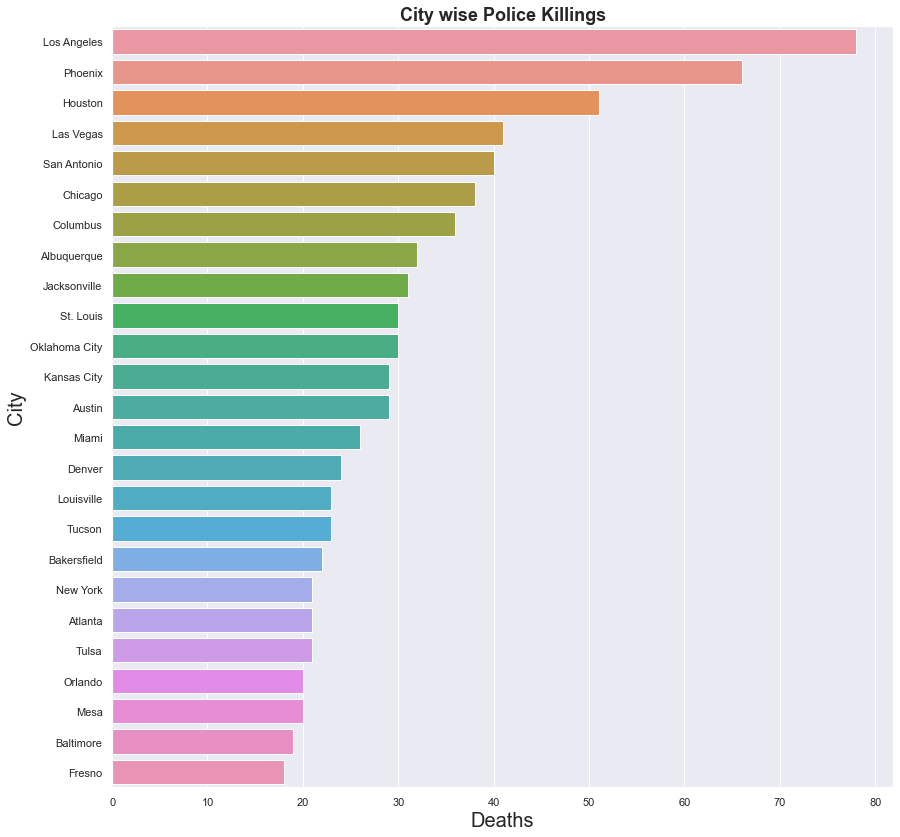

In [39]:
data3 = data1.city.value_counts().reset_index().rename(columns={'index':'city', 'city' : 'deaths'}).head(25)
plt.figure(figsize = (14,14))
sns.barplot(x = 'deaths' , y = 'city' , data = data3)
plt.title('City wise Police Killings' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.xlabel("Deaths",fontsize=20)
plt.ylabel("City",fontsize=20)
plt.show()

In [40]:
data1.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [41]:
data1.loc[data1['state'] == 'NJ'].describe()

,id,age
count,60.000000,60.000000
mean,2778.316667,37.233333
std,1688.691074,12.446995
min,52.000000,18.000000
25%,1462.000000,27.750000
50%,2481.000000,36.500000
75%,4078.000000,46.000000
max,5873.000000,75.000000


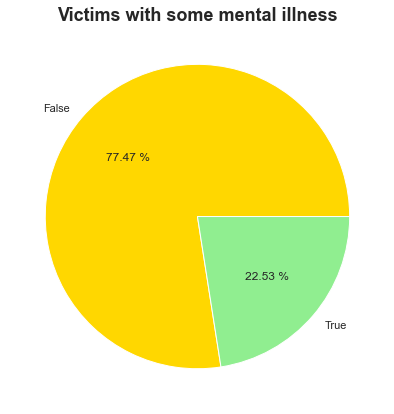

In [42]:
plt.figure(figsize = (7,7))
plt.pie(data1.signs_of_mental_illness.value_counts() , autopct = '%.2f %%' , colors = ['gold','lightgreen'],
       labels = [ 'False','True' ])
plt.title('Victims with some mental illness' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

In [43]:
data1.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [44]:
data1.loc[data1['armed'] == 'unarmed'].describe()

,id,age
count,348.000000,348.000000
mean,2640.922414,32.481241
std,1701.155245,11.042383
min,5.000000,6.000000
25%,1073.000000,24.000000
50%,2601.000000,31.000000
75%,4081.250000,38.000000
max,5918.000000,84.000000


In [45]:
print(np.unique(data1.armed))

['BB gun' 'BB gun and vehicle' 'Taser' 'air conditioner' 'air pistol' 'ax'
 'barstool' 'baseball bat' 'baseball bat and bottle'
 'baseball bat and fireplace poker' 'baseball bat and knife' 'baton'
 'bayonet' 'bean-bag gun' 'beer bottle' 'blunt object' 'bow and arrow'
 'box cutter' 'brick' 'car, knife and mace' 'carjack' 'chain' 'chain saw'
 'chainsaw' 'chair' "contractor's level" 'cordless drill' 'crossbow'
 'crowbar' 'fireworks' 'flagpole' 'flashlight' 'garden tool' 'glass shard'
 'grenade' 'gun' 'gun and car' 'gun and knife' 'gun and sword'
 'gun and vehicle' 'guns and explosives' 'hammer' 'hand torch' 'hatchet'
 'hatchet and gun' 'ice pick' 'incendiary device' 'knife'
 'lawn mower blade' 'machete' 'machete and gun' 'meat cleaver'
 'metal hand tool' 'metal object' 'metal pipe' 'metal pole' 'metal rake'
 'metal stick' 'motorcycle' 'nail gun' 'oar' 'pellet gun' 'pen'
 'pepper spray' 'pick-axe' 'piece of wood' 'pipe' 'pitchfork' 'pole'
 'pole and knife' 'rock' 'samurai sword' 'scissors'

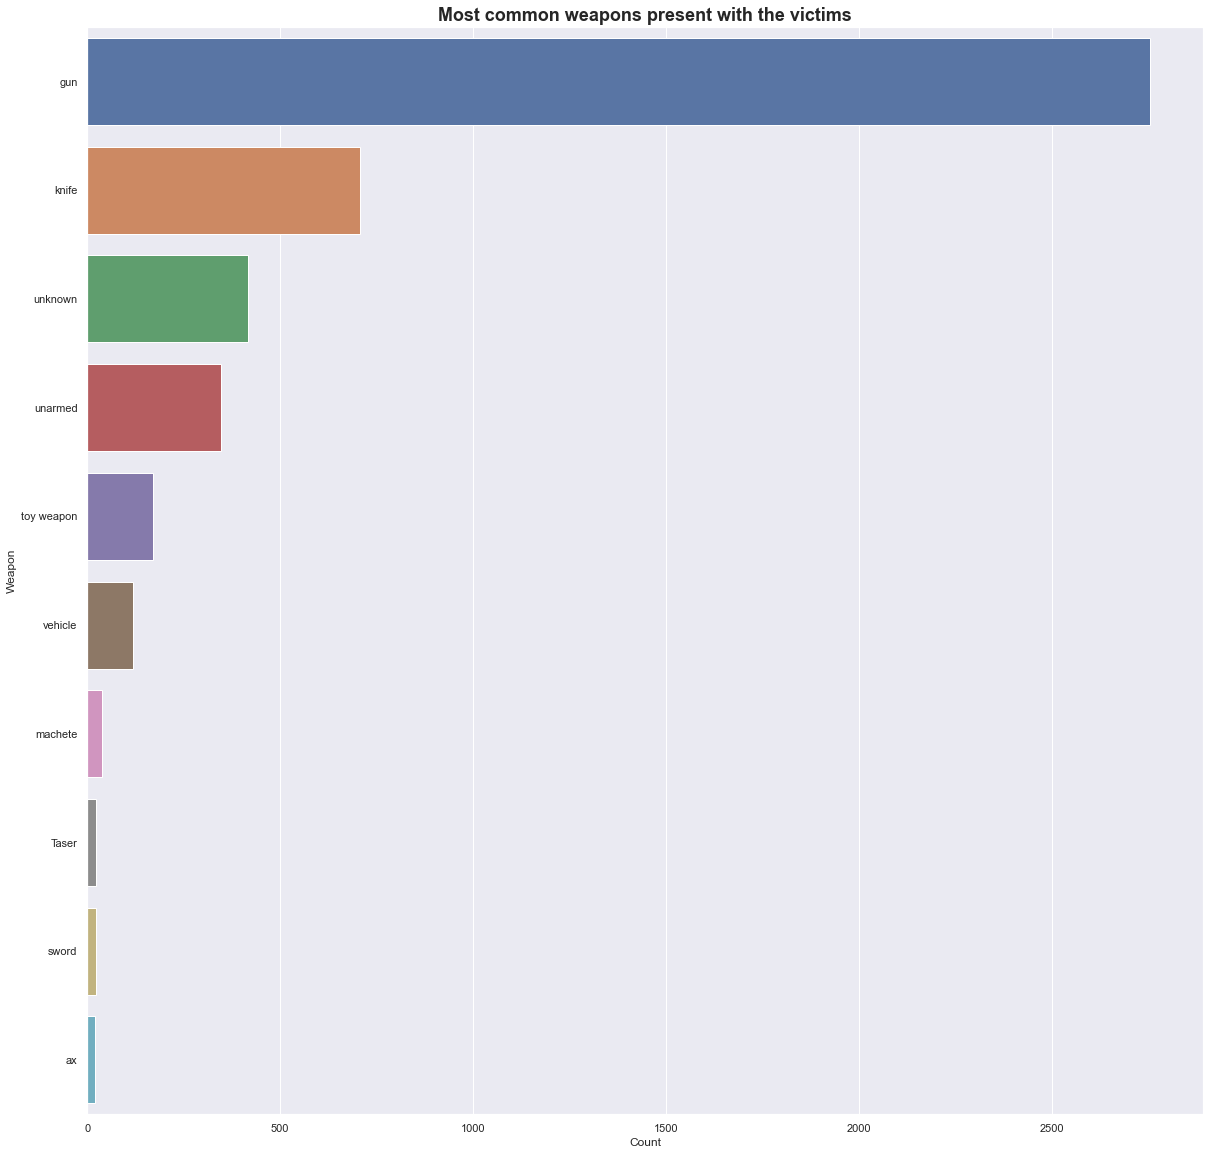

In [47]:
data4 = data1['armed'].value_counts().reset_index().head(10)
data4.columns = ['Weapon' , 'Count']

plt.figure(figsize = (20,20))
sns.barplot(x = 'Count' , y = 'Weapon' , data = data4)
plt.title('Most common weapons present with the victims' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

In [48]:
data1.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000
